In [39]:
from numpy import *
def loadDataSet(fileName):
    # 特征种类的个数
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr)
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        print('This matrix is signular,cannot do inverse')
        return
    ws = xTx.I *(xMat.T*yMat.T)
#     ws = linalg.solve(xTx,xMat.T * yMat.T)
    return ws

In [40]:
xArr,yArr = loadDataSet('ex0.txt')

In [41]:
# xArr[0:2]
ws = standRegres(xArr,yArr)

In [42]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [54]:
# 转换为矩阵
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

## 绘制数据集散点和最佳拟合直线图

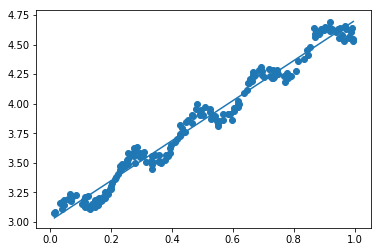

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:,1],yHat)
plt.show()

## 通过计算两个序列的相关系数计算预测值yHat序列和真实值y序列的匹配程度

## 通过python中numpy的corrcoef来进行计算相关系数

In [63]:
yHat = xMat * ws

In [71]:
# yHat
# yMat

In [65]:
corrcoef(yHat.T,yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

# 该矩阵包含所有两两组合的相关系数。可以看出，对角线上的元素都为1，因为yMat和自己的匹配是最完美的，而yHat和yMat的相关系数为0.98

In [72]:
# 局部加权线性回归函数
def lwlr(testPoint,xArr,yArr,k = 1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    # 为每一个点设置权重
    weights = mat(eye(m))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular,cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr,xArr,yArr,k = 1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [73]:
xArr,yArr = loadDataSet('ex0.txt')

In [75]:
# yArr[0]
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[3.12204471]])

In [76]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[3.20175729]])

In [100]:
# yHat = lwlrTest(xArr,xArr,yArr,1)
yHat = lwlrTest(xArr,xArr,yArr,0.01)
# yHat = lwlrTest(xArr,xArr,yArr,0.003)
# k取1的时候权重很大，如同将所有的数据视为等权重，k取0.01时得到了非常好的效果，k取0.003时引入了过多的噪声点

In [101]:
yHat

array([3.20366661, 3.75415715, 4.56556721, 4.24973353, 4.58577862,
       3.91515556, 3.54877124, 3.13303701, 3.14710194, 3.14724125,
       3.50006558, 4.1457998 , 4.24561009, 3.46612545, 4.59169226,
       3.95301434, 3.52475007, 3.15487233, 4.09194406, 3.44272223,
       3.20768858, 3.20270459, 4.63153175, 4.25573966, 3.08266612,
       3.50541389, 3.14819616, 3.35770491, 3.99303817, 3.87185536,
       3.15915814, 3.15157311, 3.85427261, 4.63141764, 4.59202818,
       3.5704081 , 3.60679615, 4.59524137, 3.6769338 , 4.63801847,
       3.18671749, 4.22478601, 3.54988044, 3.44612495, 3.85025448,
       3.16444311, 3.52865869, 3.92850777, 3.9298735 , 4.24934532,
       4.2252834 , 3.51327392, 3.22366235, 4.30376135, 3.50519756,
       3.5094099 , 3.84043837, 4.26896796, 3.91148773, 3.55474092,
       3.155514  , 4.26104563, 4.25359842, 4.23059321, 3.15365727,
       3.99750379, 3.55393999, 3.56804865, 4.22722856, 3.16335934,
       3.16383899, 4.21949168, 3.52383194, 4.56980617, 3.57227

In [102]:
xMat = mat(xArr)

In [103]:
srtInd = xMat[:,1].argsort(0)

In [104]:
xSort = xMat[srtInd][:,0,:]

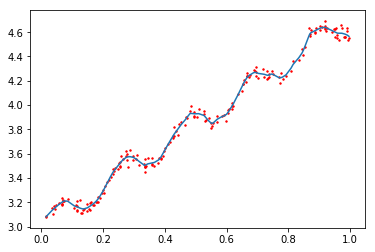

In [105]:
# 可视化拟合图
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s = 2,c = 'red')
plt.show()

## 预测鲍鱼的年龄

In [106]:
def rssError(yArr,yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [107]:
abX,abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)

In [110]:
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)

In [116]:
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [113]:
# 为了分析预测错误的大小，可以用函数rssError()计算出这一指标
rssError(abY[0:99],yHat01.T)

56.78420911837208

In [114]:
rssError(abY[0:99],yHat1.T)

429.89056187030394

In [117]:
rssError(abY[0:99],yHat10.T)

549.1181708826065

In [119]:
yHat01 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
rssError(abY[100:199],yHat01.T)

25119.459111157415

In [120]:
yHat1 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
rssError(abY[100:199],yHat1.T)

573.5261441895706

In [121]:
yHat10 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)
rssError(abY[100:199],yHat10.T)

517.5711905381745

In [122]:
ws = standRegres(abX[0:99],abY[0:99])
yHat = mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.6363153249081

## 岭回归

In [126]:
# 岭回归
def ridgeRegres(xMat,yMat,lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(denom) == 0.0:
        print("this is matrix is singular,cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws
def ridgeTest(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [127]:
abX,abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX,abY)

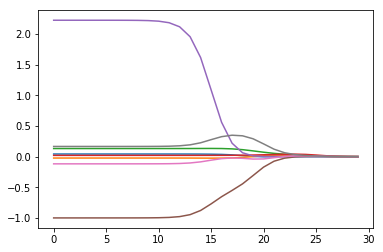

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [130]:
# abX

## 前向逐步回归

In [154]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [158]:
# 前向逐步线性回归
from numpy import *
def stageWise(xArr,yArr,eps = 0.01,numIt = 100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = inf
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [159]:
# stageWise(xArr,yArr,0.01,200)
xArr,yArr =  loadDataSet('abalone.txt')

In [160]:
# stageWise(xArr,yArr,0.01,200)
stageWise(xArr,yArr,0.001,5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[0.    0.    0.005 0.052 0.    0.    0.    0.101]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.103]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.104]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.106]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.107]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.108]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.109]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.109]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.11 ]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.111]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.112]]
[[0.    0.    0.005 0.049 0.    0.    0.    0.113]]
[[0.    0.    0.005 0.048 0.    0.    0.    0.113]]
[[0.    0.    0.005 0.048 0.    0.    0.    0.114]]
[[0.    0.    0.005 0.048 0.    0.    0.    0.115]]
[[0.    0.  

[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.092  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.093  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.093  0.     0.185]]
[[ 0.     0.     0.005  0.044  0.    -0.094  0.     0.185]]
[[ 0.     0.     0.005  0.044  0.    -0.094  0.     0.186]]
[[ 0.     0.     0.005  0.043  0.    -0.094  0.     0.186]]
[[ 0.     0.     0.005  0.043  0.    -0.094  0.     0.187]]
[[ 0.     0.     0.005  0.043  0.    -0.094  0.     0.188]]
[[ 0.     0.     0.005  0.043  0.    -0.095  0.     0.188]]
[[ 0.     0.     0.005  0.043  0.    -0.095  0.     0.189]]
[[ 0.     0.     0.005  0.043  0.    -0.096  0.     0.189]]
[[ 0.     0.     0.005  0.043  0.    -0.096  0.     0.19 ]]
[[ 0.     0.     0.005  0.043  0.    -0.097  0.     0.19 ]]
[[ 0.     0.     0.005  0.043  0.    -0.098  0.     0.19 ]]
[[ 0.     0.     0.005  0.043  0.    -0.

[[ 0.     0.     0.023  0.039  0.    -0.205  0.     0.243]]
[[ 0.     0.     0.023  0.039  0.    -0.206  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.206  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.207  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.208  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.208  0.     0.244]]
[[ 0.     0.     0.024  0.039  0.    -0.209  0.     0.244]]
[[ 0.     0.     0.024  0.039  0.    -0.209  0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.21   0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.212  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.214  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.215  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.

[[ 0.     0.     0.052  0.034  0.    -0.32   0.     0.288]]
[[ 0.     0.     0.053  0.034  0.    -0.32   0.     0.288]]
[[ 0.     0.     0.053  0.034  0.    -0.321  0.     0.288]]
[[ 0.     0.     0.053  0.034  0.    -0.322  0.     0.288]]
[[ 0.     0.     0.053  0.034  0.    -0.322  0.     0.289]]
[[ 0.     0.     0.053  0.034  0.    -0.323  0.     0.289]]
[[ 0.     0.     0.053  0.034  0.    -0.323  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.324  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.325  0.     0.29 ]]
[[ 0.     0.     0.053  0.034  0.    -0.325  0.     0.291]]
[[ 0.     0.     0.053  0.034  0.    -0.326  0.     0.291]]
[[ 0.     0.     0.053  0.034  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.054  0.034  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.054  0.033  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.055  0.033  0.    -0.327  0.     0.291]]
[[ 0.     0.     0.055  0.033  0.    -0.327  0.     0.292]]
[[ 0.     0.     0.055  0.033  0.    -0.

[[ 0.     0.     0.082  0.028  0.    -0.434  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.435  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.436  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.436  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.437  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.439  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.441  0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.442  0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.442  0.     0.338]]
[[ 0.     0.     0.084  0.028  0.    -0.443  0.     0.338]]
[[ 0.     0.     0.084  0.028  0.    -0.444  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.444  0.     0.338]]
[[ 0.     0.     0.085  0.028  0.    -0.

[[ 0.     0.     0.108  0.024  0.021 -0.545  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.022 -0.545  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.022 -0.546  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.023 -0.546  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.024 -0.546  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.024 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.025 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.026 -0.547  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.026 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.027 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.028 -0.548  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.028 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.029 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.03  -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.031 -0.549  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.031 -0.55   0.     0.374]]
[[ 0.     0.     0.108  0.024  0.032 -0.

[[ 0.004  0.     0.11   0.022  0.157 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.158 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.158 -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.159 -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.161 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.593 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.163 -0.593 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.164 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.164 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.165 -0.593 -0.006  0.374]]
[[ 0.005  0.     0.11   0.022  0.165 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.166 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.167 -0.593 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.168 -0.

[[ 0.007  0.     0.11   0.022  0.293 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.294 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.294 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.295 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.296 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.296 -0.62  -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.297 -0.62  -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.298 -0.62  -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.298 -0.62  -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.298 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.299 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.3   -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.301 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.301 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.302 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.303 -0.621 -0.015  0.362]]
[[ 0.008  0.     0.11   0.022  0.304 -0.

[[ 0.01   0.     0.11   0.022  0.416 -0.643 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.417 -0.643 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.418 -0.643 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.419 -0.643 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.419 -0.644 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.42  -0.644 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.421 -0.644 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.421 -0.645 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.422 -0.645 -0.021  0.35 ]]
[[ 0.01   0.     0.11   0.022  0.423 -0.645 -0.021  0.35 ]]
[[ 0.011  0.     0.11   0.022  0.423 -0.645 -0.021  0.35 ]]
[[ 0.011  0.     0.11   0.022  0.424 -0.645 -0.021  0.35 ]]
[[ 0.011  0.     0.11   0.022  0.424 -0.645 -0.021  0.349]]
[[ 0.011  0.     0.11   0.022  0.425 -0.645 -0.021  0.349]]
[[ 0.011  0.     0.11   0.022  0.426 -0.645 -0.021  0.349]]
[[ 0.011  0.     0.11   0.022  0.427 -0.645 -0.021  0.349]]
[[ 0.011  0.     0.11   0.022  0.427 -0.

[[ 0.012  0.     0.11   0.022  0.533 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.534 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.535 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.536 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.536 -0.666 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.537 -0.666 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.538 -0.666 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.539 -0.666 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.54  -0.666 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.54  -0.667 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.541 -0.667 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.542 -0.667 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.542 -0.668 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.543 -0.668 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.544 -0.668 -0.028  0.338]]
[[ 0.012  0.     0.11   0.022  0.544 -0.668 -0.028  0.337]]
[[ 0.012  0.     0.11   0.022  0.545 -0.

[[ 0.015  0.     0.11   0.022  0.662 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.663 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.663 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.664 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.665 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.666 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.666 -0.693 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.667 -0.693 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.668 -0.693 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.668 -0.694 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.669 -0.694 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.67  -0.694 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.671 -0.694 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.671 -0.694 -0.034  0.324]]
[[ 0.015  0.     0.11   0.022  0.672 -0.694 -0.034  0.324]]
[[ 0.015  0.     0.11   0.022  0.673 -0.694 -0.034  0.324]]
[[ 0.015  0.     0.11   0.022  0.674 -0.

[[ 0.017  0.     0.11   0.022  0.795 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.795 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.796 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.798 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.799 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.799 -0.719 -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.8   -0.719 -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.801 -0.719 -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.802 -0.719 -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.802 -0.72  -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.803 -0.72  -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.804 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.804 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.805 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.805 -0.

[[ 0.02   0.     0.11   0.022  0.933 -0.746 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.934 -0.746 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.935 -0.746 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.935 -0.747 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.936 -0.747 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.937 -0.747 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.937 -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.938 -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.939 -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.94  -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.941 -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.941 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.942 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.943 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.944 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.945 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.945 -0.

[[ 0.023  0.     0.11   0.022  1.063 -0.771 -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.064 -0.771 -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.064 -0.772 -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.065 -0.772 -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.066 -0.772 -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.066 -0.772 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.067 -0.772 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.068 -0.772 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.069 -0.772 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.069 -0.773 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.07  -0.773 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.071 -0.773 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.071 -0.774 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.072 -0.774 -0.055  0.284]]
[[ 0.023  0.     0.11   0.022  1.073 -0.774 -0.055  0.284]]
[[ 0.024  0.     0.11   0.022  1.073 -0.774 -0.055  0.284]]
[[ 0.024  0.     0.11   0.022  1.074 -0.

[[ 0.026  0.     0.11   0.022  1.196 -0.798 -0.062  0.272]]
[[ 0.026  0.     0.11   0.022  1.196 -0.799 -0.062  0.272]]
[[ 0.026  0.     0.11   0.022  1.197 -0.799 -0.062  0.272]]
[[ 0.026  0.     0.11   0.022  1.198 -0.799 -0.062  0.272]]
[[ 0.026  0.     0.11   0.022  1.199 -0.799 -0.062  0.272]]
[[ 0.026  0.     0.11   0.022  1.199 -0.799 -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.2   -0.799 -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.201 -0.799 -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.202 -0.799 -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.202 -0.8   -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.203 -0.8   -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.204 -0.8   -0.062  0.271]]
[[ 0.026  0.     0.11   0.022  1.204 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.205 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.206 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.207 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.207 -0.

[[ 0.029  0.     0.11   0.022  1.331 -0.825 -0.069  0.258]]
[[ 0.029  0.     0.11   0.022  1.332 -0.825 -0.069  0.258]]
[[ 0.029  0.     0.11   0.022  1.333 -0.825 -0.069  0.258]]
[[ 0.029  0.     0.11   0.022  1.333 -0.825 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.334 -0.825 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.335 -0.825 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.336 -0.825 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.336 -0.826 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.337 -0.826 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.338 -0.826 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.338 -0.827 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.339 -0.827 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.34  -0.827 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.34  -0.828 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.341 -0.828 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.342 -0.828 -0.069  0.257]]
[[ 0.03   0.     0.11   0.022  1.342 -0.

[[ 0.032  0.     0.111  0.022  1.474 -0.853 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.474 -0.854 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.475 -0.854 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.476 -0.854 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.476 -0.855 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.477 -0.855 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.478 -0.855 -0.077  0.243]]
[[ 0.032  0.     0.111  0.022  1.478 -0.855 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.479 -0.855 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.48  -0.855 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.481 -0.855 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.482 -0.855 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.482 -0.856 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.483 -0.856 -0.077  0.242]]
[[ 0.032  0.     0.111  0.022  1.484 -0.856 -0.077  0.242]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.484e+00 -8.560e-01
  -7.700e-02  2.420e-01]]
[[ 3.2

[[ 0.035 -0.003  0.113  0.022  1.619 -0.882 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.62  -0.882 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.62  -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.621 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.623 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.625 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.626 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.628 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.629 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.63  -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.631 -0.

[[ 0.038 -0.005  0.115  0.022  1.744 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.744 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.745 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.746 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.747 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.747 -0.908 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.748 -0.908 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.749 -0.908 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.749 -0.909 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.75  -0.909 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.751 -0.909 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.751 -0.91  -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.752 -0.91  -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.753 -0.91  -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.753 -0.91  -0.091  0.214]]
[[ 0.038 -0.005  0.115  0.022  1.754 -0.91  -0.091  0.214]]
[[ 0.038 -0.005  0.115  0.022  1.755 -0.

[[ 0.04  -0.007  0.117  0.022  1.873 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.874 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.875 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.876 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.876 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.877 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.878 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.878 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.879 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.88  -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.881 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.881 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.882 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.883 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.885 -0.

[[ 0.043 -0.01   0.119  0.022  2.002 -0.959 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.003 -0.959 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.004 -0.959 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.005 -0.959 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.005 -0.959 -0.105  0.189]]
[[ 0.043 -0.01   0.12   0.022  2.005 -0.959 -0.105  0.189]]
[[ 0.043 -0.01   0.12   0.022  2.005 -0.959 -0.105  0.188]]
[[ 0.043 -0.01   0.12   0.022  2.006 -0.959 -0.105  0.188]]
[[ 0.043 -0.01   0.12   0.022  2.007 -0.959 -0.105  0.188]]
[[ 0.043 -0.01   0.12   0.022  2.008 -0.959 -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.008 -0.959 -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.009 -0.959 -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.01  -0.959 -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.011 -0.959 -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.011 -0.96  -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.012 -0.96  -0.105  0.188]]
[[ 0.043 -0.011  0.12   0.022  2.013 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

## 把这些结果与最小二乘法相比较

In [161]:
xMat = mat(xArr)
yMat = mat(yArr).T

In [162]:
yM = mean(yMat,0)
yMat = yMat - yM
weights = standRegres(xMat,yMat.T)

In [163]:
weights.T

matrix([[ 5.01821697e-03, -1.97866385e+01,  1.35946116e+01,
          5.56623769e+00,  1.02059743e+01, -1.80014102e+01,
         -5.43709497e+00,  1.31980906e+01]])

## 购物信息的获取函数

In [179]:
from  time import sleep
import json
# import urllib3
from urllib.request import urlopen
def searchForSet(retX,retY,setNum,yr,numPce,origPrc):
    sleep(10)
    myAPIstr = 'get from code.google.com'
    searchURL = 'https://www.googleapis.com/shopping/search/v1/public/products?key=%s&country=US&q=lego+%d&alt=json' %(myAPIstr,setNum)
    pg = urlopen(searchURL)
    retDict = json.loads(pg.read())
    for i in range(len(retDict['items'])):
        try:
            currItem = retDict['items'][i]
            if currItem['product']['condition'] == 'new':
                newFlag = 1
            else:
                newFlag = 0
            listOfInv = currItem['product']['inventories']
            for item in listOfInv:
                sellingPrice = item['price']
                if sellingPrice > origPrc * 0.5:
                    print("%d\t%d\t%d\t%f\t%f" %(yr,numPce,newFlag,origPrc,sellingPrice))
                    retX.append([yr,numPce,newFlag,origPrc])
                    retY.append(sellingPrice)
        except:
            print("problem witn item %d " %(i))
def setDataCollect(retX,retY):
    searchForSet(retX, retY, 8288,  2006,  800, 49.99)
    searchForSet(retX, retY, 10030, 2002, 3096, 269.99)
    searchForSet(retX, retY, 10179, 2007, 5195, 499.99)
    searchForSet(retX, retY, 10181, 2007, 3428, 199.99)
    searchForSet(retX, retY, 10189, 2008, 5922, 299.99)
    searchForSet(retX, retY, 10196, 2009, 3263, 249.99)

In [180]:
lgX = []
lgY = []

In [181]:
setDataCollect(lgX,lgY)

URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>